In [229]:
library(qvalue)
library(dplyr)
library(ggplot2)

In [230]:
###### Day 52 untreated dopaminergic neurons (DA)
### only donors with at least 10 cells

In [231]:
##### k=10 nearest neighbours

In [232]:
### 10 PCs as envs

In [233]:
mydir = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/"
folder = paste0(mydir, "da_d52_untreated_pseudocells_20_harmony_PCs_atleast10cells_10nn/10_PCs/")
filename = paste0(folder, "summary_results.csv")
df = read.csv(filename, row.names=1)

In [234]:
nrow(df)
head(df)

[1] 1024

,gene,pv,chrom,snp_id
0,ENSG00000100804,0.8408623,14,14_23499321_C_A
1,ENSG00000159063,0.7972347,11,11_77809456_C_T
2,ENSG00000160404,0.4569540,9,9_130494667_G_A
3,ENSG00000123159,0.1765076,19,19_14602318_A_G
4,ENSG00000106077,0.4115576,7,7_73150694_A_C
5,ENSG00000120915,0.9464081,8,8_27390192_G_A


In [235]:
df$qv = qvalue(df$pv)$qvalues
nrow(df[df$qv<0.05,])
nrow(df[df$qv<0.05,])/nrow(df)

[1] 134

[1] 0.1308594

In [236]:
df_10nn = df

In [237]:
df_sign = df[df$qv<0.05,]
df_sign$feature_id = df_sign$gene
head(df_sign)

,gene,pv,chrom,snp_id,qv,feature_id
15,ENSG00000240972,0.007460793,22,22_24249458_A_C,0.03146892,ENSG00000240972
16,ENSG00000077080,0.006022181,7,7_100220850_C_G,0.02897300,ENSG00000077080
24,ENSG00000198242,0.009418784,17,17_26887271_G_A,0.03325127,ENSG00000198242
42,ENSG00000227354,0.002573053,13,13_79980340_C_T,0.02161137,ENSG00000227354
43,ENSG00000077458,0.006915427,11,11_95760920_G_A,0.03146892,ENSG00000077458
48,ENSG00000172247,0.018803697,11,11_47699883_T_C,0.04779913,ENSG00000172247


In [238]:
#### Save significant to estimate (pseudo)cell-level effect sizes

In [239]:
mydir = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/"
myfolder = paste0(mydir, "da_d52_untreated_pseudocells_20_harmony_PCs_atleast10cells_10nn/10_PCs/")
filename = paste0(myfolder, "sc_slmm_significant_fdr_5pct.csv")
write.csv(df_sign[,c("feature_id","snp_id")], filename)

In [240]:
##### k=5 nearest neighbours

In [256]:
### 10 PCs as envs

In [285]:
mydir = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/"
folder = paste0(mydir, "da_d52_untreated_pseudocells_20_harmony_PCs_atleast10cells_5nn/10_PCs/")
filename = paste0(folder, "summary_results.csv")
df = read.csv(filename, row.names=1)

In [286]:
nrow(df)
head(df)

[1] 1024

,gene,pv,chrom,snp_id
0,ENSG00000100804,0.814450299,14,14_23499321_C_A
1,ENSG00000159063,0.379909415,11,11_77809456_C_T
2,ENSG00000160404,0.031438049,9,9_130494667_G_A
3,ENSG00000123159,0.002709874,19,19_14602318_A_G
4,ENSG00000106077,0.027514641,7,7_73150694_A_C
5,ENSG00000120915,0.361467018,8,8_27390192_G_A


In [287]:
df$qv = qvalue(df$pv)$qvalues
nrow(df[df$qv<0.05,])
nrow(df[df$qv<0.05,])/nrow(df)

[1] 41

[1] 0.04003906

In [288]:
df_5nn = df

In [289]:
#### Save significant to estimate (pseudo)cell-level effect sizes

In [290]:
df_sign = df[df$qv<0.05,]
df_sign$feature_id = df_sign$gene
head(df_sign)

,gene,pv,chrom,snp_id,qv,feature_id
3,ENSG00000123159,0.002709874,19,19_14602318_A_G,0.03857056,ENSG00000123159
10,ENSG00000164615,0.001261634,5,5_134036784_G_A,0.02882014,ENSG00000164615
15,ENSG00000240972,0.003371007,22,22_24249458_A_C,0.04141260,ENSG00000240972
16,ENSG00000077080,0.002843356,7,7_100220850_C_G,0.03912145,ENSG00000077080
34,ENSG00000143155,0.001326615,1,1_168153801_T_C,0.02882014,ENSG00000143155
76,ENSG00000145348,0.002498025,4,4_106945077_A_G,0.03857056,ENSG00000145348


In [291]:
mydir = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/"
myfolder = paste0(mydir, "da_d52_untreated_pseudocells_20_harmony_PCs_atleast10cells_5nn/10_PCs/")
filename = paste0(myfolder, "sc_slmm_significant_fdr_5pct.csv")
write.csv(df_sign[,c("feature_id","snp_id")], filename)

In [292]:
#### Compare results

In [293]:
df1 = df_10nn[df_10nn$qv<0.05,]
df2 = df_5nn[df_5nn$qv<0.05,]

In [294]:
egenes_10 = df1$gene
egenes_5 = df2$gene

In [295]:
length(egenes_10)
length(egenes_5)
length(egenes_5[egenes_5 %in% egenes_10])
length(egenes_5[egenes_5 %in% egenes_10])/length(egenes_5)

[1] 134

[1] 41

[1] 19

[1] 0.4634146

In [296]:
df3 = inner_join(df_5nn, df_10nn, by = c("gene","chrom","snp_id"), suffix = c(".5",".10"))
nrow(df3)

[1] 1024

In [297]:
cor.test(-log10(df3$pv.5),-log10(df3$pv.10))


	Pearson's product-moment correlation

data:  -log10(df3$pv.5) and -log10(df3$pv.10)
t = 10.729, df = 1022, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2620160 0.3721784
sample estimates:
      cor 
0.3181708 


[1] 0.3181708

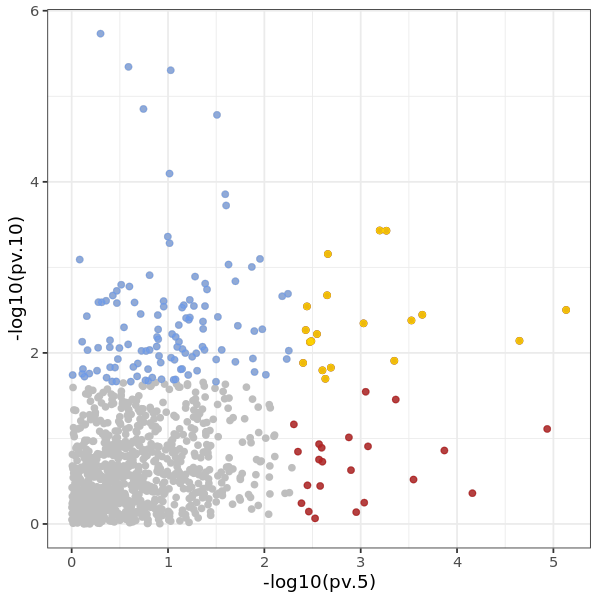

In [298]:
cor(-log10(df3$pv.5),-log10(df3$pv.10))
options(repr.plot.width=5, repr.plot.height=5)
ggplot(df3, aes(x = -log10(pv.5), y = -log10(pv.10))) + geom_point(col = 'grey') +
    geom_point(aes(x = -log10(pv.5), y = -log10(pv.10)), data = df3[df3$qv.10<0.05,], col = "cornflowerblue", alpha = 0.5)+
    geom_point(aes(x = -log10(pv.5), y = -log10(pv.10)), data = df3[df3$qv.5<0.05,], col = "firebrick", alpha = 0.8) + 
    geom_point(aes(x = -log10(pv.5), y = -log10(pv.10)), data = df3[df3$qv.5<0.05 & df3$qv.10<0.05,], col = "gold", alpha = 0.8) + 
    theme_bw()